# **Creating a Simple Portfolio using Python**
In this project, focus will be on creating a sample portfolio and finding out portfolio simple returns, get daily returns, volatility, etc.The data is extracted from Yahoo Finance using Pandas Data Reader. 

### Importing the necessary libraries

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import matplotlib.dates as mdates


### Lets start creating our portfolio

In [11]:
import json
import ipywidgets as widgets
from IPython.display import display

# Load data from the uploaded file
with open('company_tickers.json', 'r') as file:
    data = json.load(file)

# Extract tickers, company names, and CIK values
available_tickers = {item["ticker"]: {"title": item["title"], "cik": item["cik_str"]} for item in data.values()}

# Dropdown widget for selecting tickers
dropdown = widgets.SelectMultiple(
    options=[(f"{info['title']} ({ticker})", ticker) for ticker, info in available_tickers.items()],
    description='Tickers:',
    disabled=False,
    rows=10
)

# Function to save selected tickers and their CIK values
selected_stocks = []  # To store selected ticker and CIK

def update_selected_stocks(change):
    global selected_stocks
    if len(dropdown.value) > 5:
        print("You can only select up to 5 tickers. Please deselect some.")
    else:
        # Clear previous selections and update with new ones
        selected_stocks.append([{"ticker": ticker, "cik": available_tickers[ticker]["cik"]} for ticker in dropdown.value])
        print(f"Selected Stocks: {selected_stocks}")

# Observe changes in selection
dropdown.observe(update_selected_stocks, names="value")

# Display dropdown
print("Select up to 5 tickers:")
display(dropdown)


Select up to 5 tickers:


SelectMultiple(description='Tickers:', options=(('NVIDIA CORP (NVDA)', 'NVDA'), ('Apple Inc. (AAPL)', 'AAPL'),…

In [12]:
# Input list of lists with dictionaries

# Convert to a single dictionary
result_dict = {item[0]['ticker']: item[0]['cik'] for item in selected_stocks}

result_dict.keys()


dict_keys(['AAPL', 'AMZN', 'META', 'GOOGL', 'NFLX'])

In [13]:
stocksymbols =list(result_dict.keys())
type(stocksymbols)

list

In [14]:
import pandas as pd
# Read the original parquet file
A = pd.read_parquet("2024.parquet")

# Initialize an empty list to hold filtered DataFrames
filtered_dataframes = []

# Loop through the dictionary and filter the data for each CIK
for company, cik in result_dict.items():
    filtered_df = A[A['cik'] == str(cik)]  # Ensure the CIK matches the data type in the file
    filtered_dataframes.append(filtered_df)

# Combine all filtered DataFrames
combined = pd.concat(filtered_dataframes, ignore_index=True)

# Save the combined DataFrame to a new Parquet file
combined.to_parquet("combined_2024.parquet", index=False)

# Optional: Display the combined DataFrame to verify
combined

A = pd.read_parquet("combined_2024.parquet")
A['date'] = A['date'].apply(lambda x: x.replace(year=2024))

In [15]:
A

,cik,sic,company,date,item_1,item_1A,item_1B,item_2,item_3,item_4,...,3_day_return,5_day_return,10_day_return,20_day_return,40_day_return,60_day_return,80_day_return,100_day_return,150_day_return,252_day_return
0,320193,3571,Apple Inc.,2024-10-28,Item 1. Business\nCompany Background\nThe Comp...,"Item 1A. Risk Factors\nThe Company’s business,...",Item 1B. Unresolved Staff Comments\nNone.,Item 2. Properties\nThe Company’s headquarters...,Item 3. Legal Proceedings\nEpic Games\nEpic Ga...,Item 4. Mine Safety Disclosures\nNot applicabl...,...,0.931231,0.890009,0.962815,0.927570,0.836305,0.836305,0.836305,0.836305,0.836305,0.836305
1,1018724,5961,AMAZON COM INC,2024-02-04,Item 1. Business\nThis Annual Report on Form 1...,Item 1A. Risk Factors\nPlease carefully consid...,Item 1B. Unresolved Staff Comments\nNone.,"Item 2. Properties\nAs of December 31, 2021, w...",Item 3. Legal Proceedings\nSee Item 8 of Part ...,Item 4. Mine Safety Disclosures\nNot applicabl...,...,1.022520,0.972431,0.968041,0.871945,1.067921,0.788213,0.771913,0.673752,0.865583,0.865583
2,1326801,7370,"Meta Platforms, Inc.",2024-02-03,Item 1.Business\nOverview\nOur mission is to g...,Item 1A.Risk Factors\nCertain factors may have...,Item 1B.Unresolved Staff Comments\nNone.,Item 2.Properties\nOur corporate headquarters ...,Item 3.Legal Proceedings\nBeginning on March 2...,Item 4.Mine Safety Disclosures\nNot applicable...,...,0.926060,0.959245,0.873612,0.841437,0.945702,0.887996,0.814435,0.689519,0.711432,0.711432
3,1652044,7370,Alphabet Inc.,2024-02-02,ITEM 1.BUSINESS\nOverview\nAs our founders Lar...,ITEM 1A.RISK FACTORS\nOur operations and finan...,ITEM 1B.UNRESOLVED STAFF COMMENTS\nNot applica...,ITEM 2.PROPERTIES\nOur headquarters are locate...,ITEM 3.LEGAL PROCEEDINGS\nFor a description of...,ITEM 4.MINE SAFETY DISCLOSURES\nNot applicable...,...,0.940547,0.956703,0.930662,0.904726,0.939645,0.771010,0.758895,0.756807,0.732297,0.732297
4,1065280,7841,NETFLIX INC,2024-01-27,"Item 1.Business\nABOUT US\nNetflix, Inc. (“Net...",Item 1A.Risk Factors\nIf any of the following ...,Item 1B.Unresolved Staff Comments\nNone.,Item 2.Properties\nWe have leased principal pr...,Item 3.Legal Proceedings\nInformation with res...,Item 4.Mine Safety Disclosures\nNot applicable...,...,1.182131,1.048875,1.050608,1.010602,0.966770,0.542824,0.484717,0.462607,0.594880,0.594880


In [16]:
# Identify rows where 'item_1A' is missing or empty
mpty_values = A[A['item_1A'].isna() | (A['item_1A'] == "")]
mpty_values.head()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Tokenize 'item_1A' for all companies
A['item_1A'] = A['item_1A'].fillna("")  # Replace NaN with empty strings
A['words'] = A['item_1A'].apply(word_tokenize)

# Convert into long format (one word per row)
stock_tokens = A.explode('words').rename(columns={'words': 'word'}).filter(['cik', 'word', 'company', 'date'])
stock_tokens.to_csv("stock_tokens.csv", index=False)


In [17]:
import yfinance as yf
from datetime import datetime

# Stock symbols for the portfolio
# stocksymbols = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]  # Updated FB to META (current ticker)
stocksymbols = list(result_dict.keys())
# Starting date (aligned with Facebook's IPO in mid-2012)
stockStartDate = "2013-01-01"

# Today's date formatted as "YYYY-mm-dd"
today = datetime.today().strftime("%Y-%m-%d")
print("Today's date:", today)

# Get the number of assets in the portfolio
numAssets = len(stocksymbols)
print("You have " + str(numAssets) + " assets in your portfolio.")

# Function to fetch the stock prices
def getMyPortfolio(stocks=stocksymbols, start=stockStartDate, end=today, col="Adj Close"):
    try:
        # Download data using yfinance
        data = yf.download(stocks, start=start, end=end)[col]
        return data
    except Exception as e:
        print("An error occurred while fetching data:", e)
        return None

# Get the stock portfolio Adj Close prices
my_stocks = getMyPortfolio(stocksymbols)

# Display the fetched data
if my_stocks is not None:
    print("Stock data fetched successfully:")
    print(my_stocks.head())
else:
    print("Failed to fetch stock data.")


[*******************   40%                       ]  2 of 5 completed

Today's date: 2025-01-22
You have 5 assets in your portfolio.


[*********************100%***********************]  5 of 5 completed

Stock data fetched successfully:
Ticker           AAPL     AMZN      GOOGL       META       NFLX
Date                                                           
2013-01-02  16.687344  12.8655  18.033974  27.893450  13.144286
2013-01-03  16.476706  12.9240  18.044447  27.664324  13.798571
2013-01-04  16.017765  12.9575  18.401012  28.650557  13.711429
2013-01-07  15.923534  13.4230  18.320724  29.308046  14.171429
2013-01-08  15.966391  13.3190  18.284569  28.949413  13.880000


In [18]:
my_stocks.to_csv("timeseries.csv")

[*********************100%***********************]  5 of 5 completed


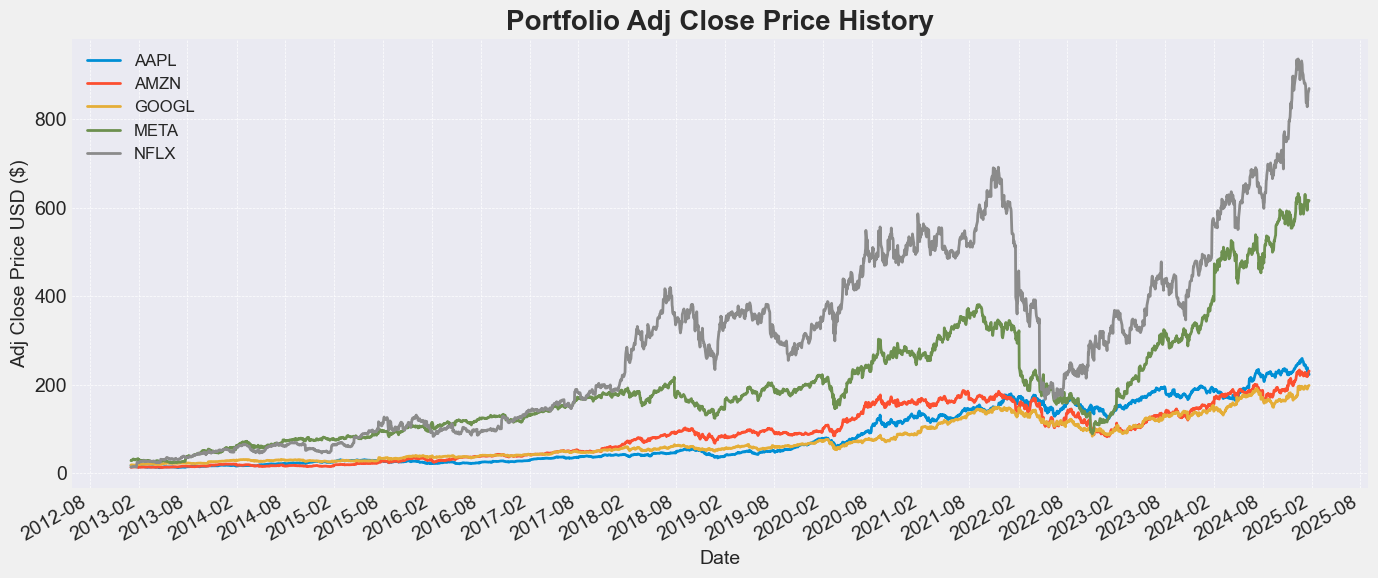

In [19]:
def showGraph(stocks=stocksymbols, start=stockStartDate, end=today, col="Adj Close"):
    # Creating a title for the portfolio
    title = f"Portfolio {col} Price History"

    # Get the stocks
    my_stocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)

    if my_stocks is None:
        print("No data available to plot.")
        return

    # Setting figure size and style
    plt.figure(figsize=(14, 6))
    plt.style.use("seaborn-v0_8-darkgrid")  # Use seaborn style for enhanced visuals

    # Loop through each stock and plot its price history
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label=c, linewidth=2)

    # Adding title and labels
    plt.title(title, fontsize=20, fontweight="bold")
    plt.xlabel("Date", fontsize=14)
    plt.ylabel(f"{col} Price USD ($)", fontsize=14)

    # Formatting the x-axis for dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gcf().autofmt_xdate()  # Auto-rotate date labels for readability

    # Adding legend
    plt.legend(my_stocks.columns.values, loc="upper left", fontsize=12)

    # Adding gridlines for better readability
    plt.grid(visible=True, linestyle="--", linewidth=0.5)

    # Display the graph
    plt.tight_layout()
    plt.show()

# Call the function to display the graph
showGraph()


Stock prices for Amazon was above $2000 for the years 2018 and later.

In [20]:
daily_simple_returns = my_stocks.pct_change(1)
print("Daily simple Returns")
daily_simple_returns.head()

Daily simple Returns


Ticker,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012623,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027854,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005883,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002691,-0.007748,-0.001973,-0.012237,-0.020565


In [21]:
correlation_df = daily_simple_returns.corr()
print("correlation Matrix")
correlation_df

correlation Matrix


Ticker,AAPL,AMZN,GOOGL,META,NFLX
Ticker,,,,,
AAPL,1.000000,0.488802,0.549107,0.463167,0.319781
AMZN,0.488802,1.000000,0.619694,0.549338,0.466804
GOOGL,0.549107,0.619694,1.000000,0.582095,0.413033
META,0.463167,0.549338,0.582095,1.000000,0.398349
NFLX,0.319781,0.466804,0.413033,0.398349,1.000000


In [22]:
covariance_df = daily_simple_returns.cov()
print("Covariance Matrix")
covariance_df

Covariance Matrix


Ticker,AAPL,AMZN,GOOGL,META,NFLX
Ticker,,,,,
AAPL,0.000310,0.000175,0.000167,0.000196,0.000162
AMZN,0.000175,0.000413,0.000218,0.000268,0.000273
GOOGL,0.000167,0.000218,0.000298,0.000242,0.000205
META,0.000196,0.000268,0.000242,0.000577,0.000275
NFLX,0.000162,0.000273,0.000205,0.000275,0.000828


Here, the diagonal elements show the variance which shows the spread from mean. The higher the variance of asset price, the higher the risk, higher the return and higher the volatility. The lower the variance, the lower the risk, lower the return and lower the volatility. The other elements in the matrix indicates the covariance.

In [23]:
variance_df = daily_simple_returns.var()
print("The Stock Variance")
variance_df

The Stock Variance


Ticker
AAPL     0.000310
AMZN     0.000413
GOOGL    0.000298
META     0.000577
NFLX     0.000828
dtype: float64

In [24]:
print("The Stock Volatility:")
std_dev_df = daily_simple_returns.std()
std_dev_df

The Stock Volatility:


Ticker
AAPL     0.017616
AMZN     0.020326
GOOGL    0.017275
META     0.024021
NFLX     0.028770
dtype: float64

We can see the most volatile stock is Netflix and the least volatile stock is Google. The higher the volatility the higher the return.

We can see that Netflix is quite volatile.

In [25]:
# Assuming the variables `correlation_df`, `covariance_df`, `variance_df`, and `std_dev_df` are defined
import openai
openai.api_key = "Enter your Key"
def generate_analysis(prompt):
    """
    Function to call OpenAI GPT-4 API and generate an analysis.
    """
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a financial data analyst."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.7,
            max_tokens=500
        )
        return response['choices'][0]['message']['content']
    except Exception as e:
        return f"Error: {e}"

# Define the analysis for each variable
def analyze_financial_data(correlation_df, covariance_df, variance_df, std_dev_df):
    analyses = {}
    
    # Correlation Analysis
    correlation_prompt = f"""
    The following is a correlation matrix for stock daily simple returns. Analyze and explain the key relationships between the stocks in 5 points:
    {correlation_df.to_string()}
    """
    analyses["Correlation Analysis"] = generate_analysis(correlation_prompt)
    
    # Covariance Analysis
    covariance_prompt = f"""
    The following is a covariance matrix for stock daily simple returns. Analyze and explain the co-movements of these stocks in 5 points:
    {covariance_df.to_string()}
    """
    analyses["Covariance Analysis"] = generate_analysis(covariance_prompt)
    
    # Variance Analysis
    variance_prompt = f"""
    The following are the variances of stock daily simple returns. Analyze and explain the spread of returns for each stock in 5 points:
    {variance_df.to_string()}
    """
    analyses["Variance Analysis"] = generate_analysis(variance_prompt)
    
    # Volatility Analysis (Standard Deviation)
    volatility_prompt = f"""
    The following are the standard deviations (volatility) of stock daily simple returns. Analyze and explain the risk for each stock in 5 points:
    {std_dev_df.to_string()}
    """
    analyses["Volatility Analysis"] = generate_analysis(volatility_prompt)
    
    return analyses

# Example usage
# Replace these with your actual DataFrames
correlation_df = daily_simple_returns.corr()
covariance_df = daily_simple_returns.cov()
variance_df = daily_simple_returns.var()
std_dev_df = daily_simple_returns.std()

# Run the analysis
results = analyze_financial_data(correlation_df, covariance_df, variance_df, std_dev_df)

# Print the results
for key, analysis in results.items():
    print(f"{key}:\n{analysis}\n")

Correlation Analysis:
Error: Incorrect API key provided: Enter yo** Key. You can find your API key at https://platform.openai.com/account/api-keys.

Covariance Analysis:
Error: Incorrect API key provided: Enter yo** Key. You can find your API key at https://platform.openai.com/account/api-keys.

Variance Analysis:
Error: Incorrect API key provided: Enter yo** Key. You can find your API key at https://platform.openai.com/account/api-keys.

Volatility Analysis:
Error: Incorrect API key provided: Enter yo** Key. You can find your API key at https://platform.openai.com/account/api-keys.


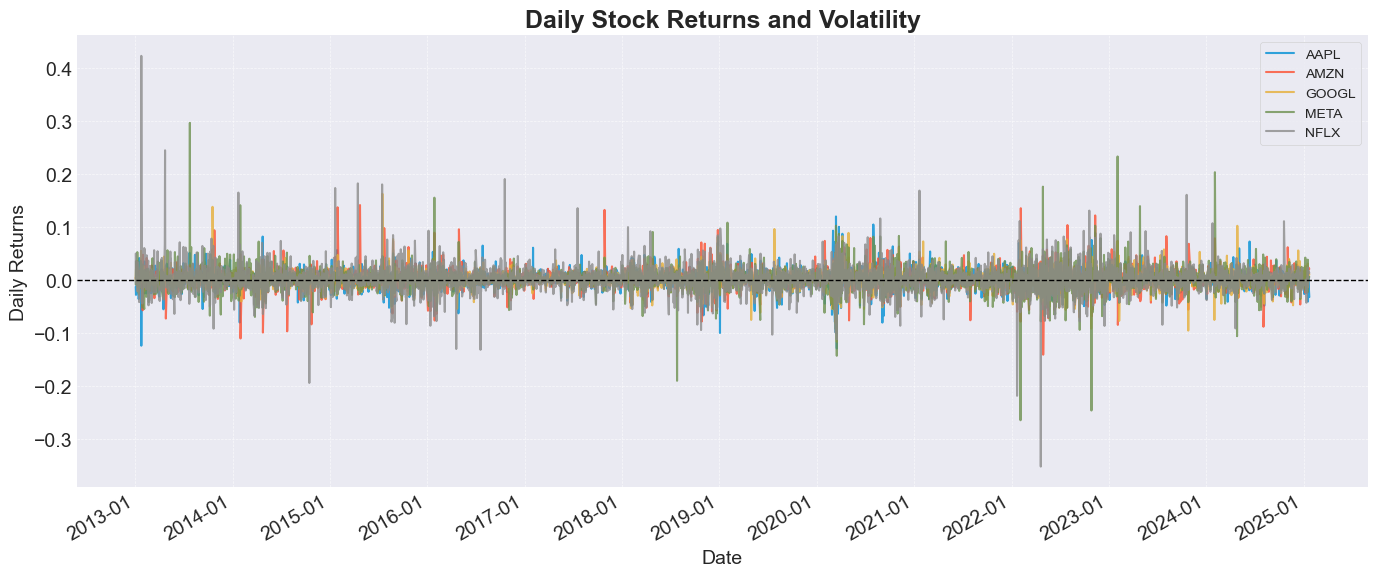

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_daily_returns(daily_simple_returns):
    """
    Visualizes the daily returns/volatility of stocks in the portfolio.
    
    :param daily_simple_returns: DataFrame of daily simple returns for stocks
    """
    # Check if the DataFrame is valid
    if daily_simple_returns is None or daily_simple_returns.empty:
        print("No data available to plot.")
        return
    
    # Set the plot size and style
    plt.figure(figsize=(14, 6))
    plt.style.use("seaborn-v0_8-darkgrid")  # Modern style

    # Loop through each stock and plot the returns
    for c in daily_simple_returns.columns.values:
        plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=1.5, label=c, alpha=0.8)

    # Formatting x-axis for dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()

    # Highlight regions of high volatility (optional)
    plt.axhline(y=0, color='black', linestyle='--', lw=1)  # Zero line for reference

    # Adding titles and labels
    plt.title("Daily Stock Returns and Volatility", fontsize=18, fontweight="bold")
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Daily Returns", fontsize=14)

    # Adding a legend
    plt.legend(loc="upper right", fontsize=10, frameon=True)

    # Display the grid
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

    # Final adjustments
    plt.tight_layout()
    plt.show()

# Example call to the function
plot_daily_returns(daily_simple_returns)


# Here on we are analyzing the Portfolio 

In [27]:
# Lets calculate the mean of the Daily Simple Returns
dailyMeanSimpleReturn = daily_simple_returns.mean()

# Print
print("The Daily Mean Simple Return is:")
print(dailyMeanSimpleReturn)

The Daily Mean Simple Return is:
Ticker
AAPL     0.001011
AMZN     0.001159
GOOGL    0.000939
META     0.001310
NFLX     0.001795
dtype: float64


Netflx will give a higher mean daily return and Google will give the lowest.

In [28]:
# Lets calculate the Expected Portfolio Daily Return
# Lets suppose we invest 40% FB, 10% AMZN, 30% AAPL, 10 NFLX, 10% GOOG of our portfolio
import numpy as np
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])

portfolioSimpleReturns = np.sum(randomWeights * dailyMeanSimpleReturn)

print("The Daily Expected Portfolio return is " + str(portfolioSimpleReturns))
print("Expected Annualised Portfolio Simple Return is " + str(portfolioSimpleReturns * 252))

The Daily Expected Portfolio return is 0.001112426569298533
Expected Annualised Portfolio Simple Return is 0.2803314954632303


Out of 365 days in the year 2021, 104 days are weekend days (Saturday and Sunday) when the stock exchanges stay closed. Apart from the weekends, there are 13 holidays in 2021. Hence, there are 252 trading days. 
With these weights we can expect a 35% return on our stocks.

In [29]:
# Lets calculate the growth on the investment

dailyCumSimplReturns = (daily_simple_returns + 1).cumprod()
dailyCumSimplReturns

Ticker,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987377,1.004547,1.000581,0.991786,1.049777
2013-01-04,0.959875,1.007151,1.020353,1.027143,1.043147
2013-01-07,0.954228,1.043333,1.015901,1.050714,1.078144
2013-01-08,0.956796,1.035249,1.013896,1.037857,1.055972
...,...,...,...,...,...
2025-01-14,13.979457,16.925886,10.516817,21.304285,63.023584
2025-01-15,14.254515,17.360382,10.843423,22.124190,64.534506
2025-01-16,13.678630,17.151296,10.697033,21.915539,64.086401


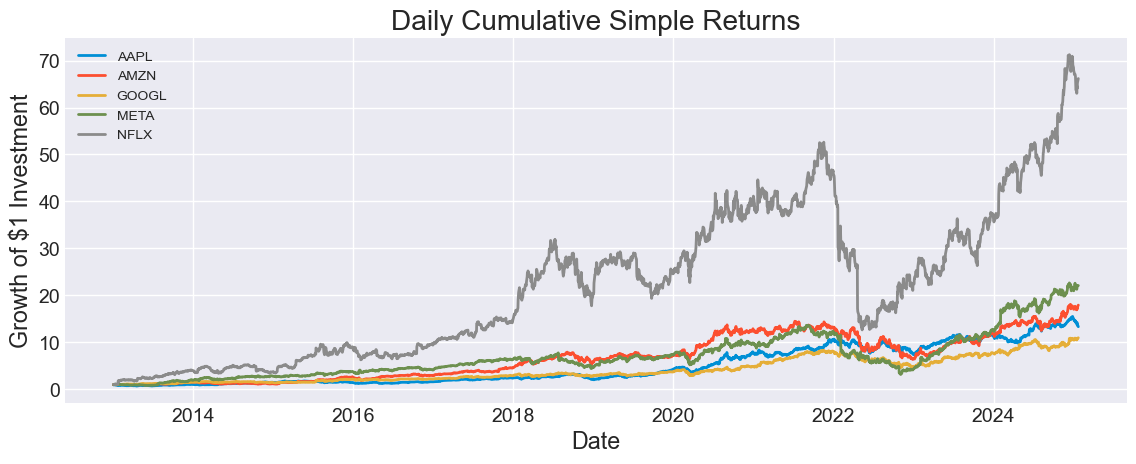

In [30]:
# Visualize the daily cumulative simple return

plt.figure(figsize = (12.2,4.5))
for c in dailyCumSimplReturns.columns.values:
  plt.plot(dailyCumSimplReturns.index, dailyCumSimplReturns[c], lw =2, label = c)

plt.legend(loc = "upper left", fontsize = 10)
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.title("Daily Cumulative Simple Returns")
plt.show();

We can see that if we have invested a dollar in Netflix stocks in 2013, it would have given a return of 40% now in 2021. Similarly, for Google it would have given back a return of less than 10% in 2021.

# ONTO THE SENTIMENT ANALYSIS PART

In [31]:
import pandas as pd

In [32]:
stock_tokens = pd.read_csv("stock_tokens.csv")
stock_tokens

,cik,word,company,date
0,320193,Item,Apple Inc.,2024-10-28
1,320193,1A,Apple Inc.,2024-10-28
2,320193,.,Apple Inc.,2024-10-28
3,320193,Risk,Apple Inc.,2024-10-28
4,320193,Factors,Apple Inc.,2024-10-28
...,...,...,...,...
74334,1065280,made,NETFLIX INC,2024-01-27
74335,1065280,forecasting,NETFLIX INC,2024-01-27
74336,1065280,more,NETFLIX INC,2024-01-27
74337,1065280,difficult,NETFLIX INC,2024-01-27


<Axes: title={'center': 'Top Sentiment Contributions'}, ylabel='word'>

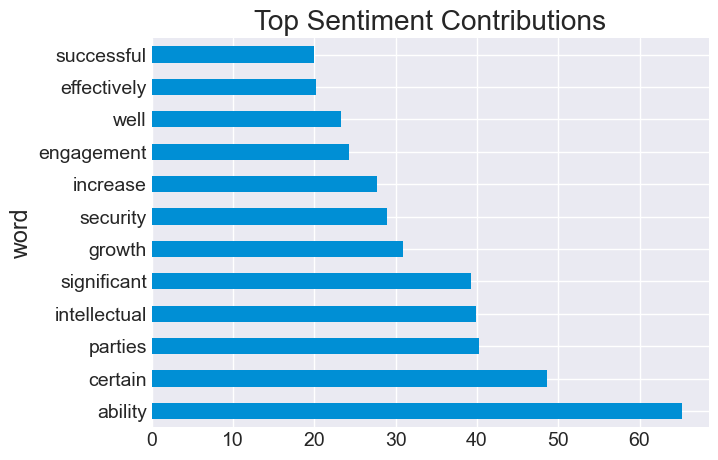

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
stock_tokens = stock_tokens.dropna(subset=['word'])  # Remove rows where 'word' is NaN
stock_tokens['word'] = stock_tokens['word'].astype(str)  # Convert all values to strings

# Filter tokens to exclude numeric values
stock_tokens = stock_tokens[~stock_tokens['word'].str.contains(r'\d+', regex=True)]
# Apply sentiment scoring

stock_tokens['afinn_score'] = stock_tokens['word'].apply(lambda word: sia.polarity_scores(word)['compound'])

# # Group by word and calculate sentiment contribution
sentiment_contribution = stock_tokens.groupby('word')['afinn_score'].sum().sort_values(ascending=False)
sentiment_contribution.head(12).plot(kind='barh', title="Top Sentiment Contributions")


In [34]:
import pandas as pd

# Read the CSV file
dict_df = pd.read_csv("LM-SA-2020.csv")

# Create a dictionary with keys as sentiment categories and values as sets of words
loughran_sentiments = {}
loughran_sentiments['negative'] = set(dict_df[dict_df['sentiment'] == 'Negative']['word'])
loughran_sentiments['positive'] = set(dict_df[dict_df['sentiment'] == 'Positive']['word'])
loughran_sentiments['uncertainty'] = set(dict_df[dict_df['sentiment'] == 'Uncertainty']['word'])

In [35]:
# Define a simplified version of the Loughran-McDonald dictionary

# Assign sentiment categories
stock_tokens['sentiment'] = stock_tokens['word'].apply(
    lambda word: next((key for key, words in loughran_sentiments.items() if word in words), "neutral")
)

# Count sentiment frequencies by company
sentiment_counts = stock_tokens.groupby(['company', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts.head()


sentiment,negative,neutral,positive,uncertainty
company,,,,
AMAZON COM INC,724,7590,257,225
Alphabet Inc.,1287,11024,340,456
Apple Inc.,1068,10098,304,267
"Meta Platforms, Inc.",2528,24924,863,779
NETFLIX INC,998,9676,290,381


<Axes: title={'center': 'Sentiment Scores by Company'}, ylabel='company'>

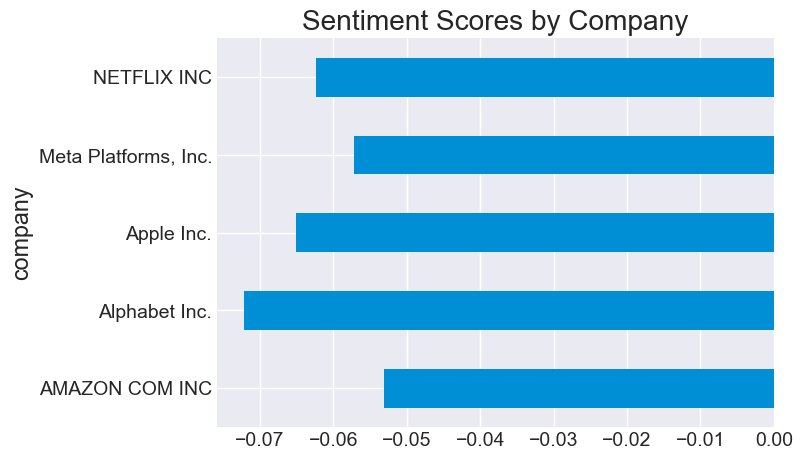

In [36]:
# Add total words by company
company_word_counts = stock_tokens.groupby('company').size().rename('total_words')

# Calculate sentiment scores
sentiment_counts = sentiment_counts.join(company_word_counts)
sentiment_counts['score'] = (sentiment_counts.get('positive', 0) - sentiment_counts.get('negative', 0)) / sentiment_counts['total_words']

sentiment_counts['score'].plot(kind='barh', title="Sentiment Scores by Company")


In [37]:
sentiment_counts

,negative,neutral,positive,uncertainty,total_words,score
company,,,,,,
AMAZON COM INC,724,7590,257,225,8796,-0.053092
Alphabet Inc.,1287,11024,340,456,13107,-0.072251
Apple Inc.,1068,10098,304,267,11737,-0.065093
"Meta Platforms, Inc.",2528,24924,863,779,29094,-0.057228
NETFLIX INC,998,9676,290,381,11345,-0.062406


In [40]:
# Merge sentiment scores back to the main dataset
B = A.merge(sentiment_counts[['score']], on='company', how='left')


In [41]:
# Fit models for different return periods
import statsmodels.api as sm

# Define independent and dependent variables
X = B[['score', 'mkt_cap']].fillna(0)  # Independent variables
Y = B['ret']  # Dependent variable (e.g., returns)

# Fit linear regression model
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

return_columns = ['1_day_return', '3_day_return', '20_day_return', '100_day_return']
summary_list = []
for col in return_columns:
    Y = B[col].fillna(0)
    model = sm.OLS(Y, X).fit()
    summary_list.append(model.summary())
    print(f"Model for {col}:\n", model.summary())


                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                 -0.590
Method:                 Least Squares   F-statistic:                    0.2576
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.795
Time:                        20:57:46   Log-Likelihood:                 3.1827
No. Observations:                   5   AIC:                           -0.3653
Df Residuals:                       2   BIC:                            -1.537
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3718      0.867     -0.429      0.7

/opt/anaconda3/envs/stopic/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/envs/stopic/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/envs/stopic/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/envs/stopic/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less th

## Regression Model Analysis for Sentiment Analysis Score with 1_day_returns, , 3_day_return, 20_day_return, and 100_day_return"""

In [42]:
summary_list

[<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           1_day_return   R-squared:                       0.932
 Model:                            OLS   Adj. R-squared:                  0.864
 Method:                 Least Squares   F-statistic:                     13.74
 Date:                Wed, 22 Jan 2025   Prob (F-statistic):             0.0679
 Time:                        20:57:46   Log-Likelihood:                 21.583
 No. Observations:                   5   AIC:                            -37.17
 Df Residuals:                       2   BIC:                            -38.34
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [ ]:
import openai

# Set up your OpenAI API key
openai.api_key = "Enter your api key"

# List of model summaries (replace this with your actual summaries)


# Function to get analysis from OpenAI
def analyze_summaries(summaries):
    analysis = []
    for summary in summaries:
        prompt = f"Give me the name of the Dependent Variable where the model is significant. Analyze the following model summary and provide insights:\n\n{summary}\n\nAnalysis:"
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",  # Updated model
            prompt=prompt,
            max_tokens=200,
            temperature=0.7
        )
        analysis.append(response['choices'][0]['text'].strip())
    return analysis

# Call the function
analysis_results = analyze_summaries(summary_list)

# Print or save the results
for i, result in enumerate(analysis_results):
    print(f"Analysis for Model {i + 1}:\n{result}\n")

Analysis for Model 1:
The dependent variable in this model is "1_day_return". The model has a high R-squared value of 0.932, indicating that it is a good fit for the data. The significant F-statistic of 13.74 also suggests that the overall model is statistically significant. 

The independent variables in this model are "const", "score", and "mkt_cap". The coefficient for "const" is 1.1026, which means that when all other variables are held constant, the expected change in the dependent variable is 1.1026 units. The coefficient for "score" is 1.8110, which suggests that for every unit increase in the "score" variable, the dependent variable is expected to increase by 1.8110 units. 

However, the coefficient for "mkt_cap" is very small and not statistically significant (p-value > 0.05). This suggests that there is no significant relationship between "mkt_cap

Analysis for Model 2:
The dependent variable in this model is "3_day_return". The model has a low R-squared value of 0.285, indic

With this Analysis we can make an informed decision based on the 10k filing data and the sentiments of the the 10k filing data to decide if we should invest in long term or have short term goals. 

# Here we are creating a model that uses CNN to predict the prices. 
- We are take the stocks data and trying to create a Neural Network that will help us predict the 1 day return of the stocks.
- We are using CNN because it is good at capturing patterns in sequential data.
- We are using the closing price of the stocks to predict the 1 day return.
- We are using the last 60 days of closing price to predict the next day's closing price.
- We are using the last 60 days of closing price because it is a good number of days to capture the patterns in the data.

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd


data = my_stocks
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Prepare the data for the CNN using a sliding window
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]  # Predict next day
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 30  # Length of the sliding window
X, y = create_sequences(data_normalized, seq_length)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Define the CNN model
class CNN1D(nn.Module):
    def __init__(self, seq_length, num_features):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
        
        # Dynamically compute the flattened size after conv2 and pooling
        test_input = torch.zeros((1, num_features, seq_length))  # Example input
        test_output = self.forward_conv(test_input)
        flattened_size = test_output.view(-1).size(0)  # Compute size after flattening
        
        self.fc1 = nn.Linear(flattened_size, 50)
        self.fc2 = nn.Linear(50, num_features)

    def forward_conv(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)
        return x

    def forward(self, x):
        x = self.forward_conv(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
num_features = X.shape[2]  # Number of stocks (or features)
model = CNN1D(seq_length=seq_length, num_features=num_features)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
batch_size = 16

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        
        # Forward pass
        outputs = model(X_batch.permute(0, 2, 1))  # Change shape to (batch, channels, seq_length)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(X.permute(0, 2, 1))
    predictions = predictions.numpy()

# Inverse transform the predictions to original scale
predictions_inverse = scaler.inverse_transform(predictions)

print("Predictions (in original scale):")
print(predictions_inverse)


Epoch 1/50, Loss: 0.7031
Epoch 2/50, Loss: 1.6146
Epoch 3/50, Loss: 0.9501
Epoch 4/50, Loss: 0.8880
Epoch 5/50, Loss: 0.7324
Epoch 6/50, Loss: 0.6973
Epoch 7/50, Loss: 1.0466
Epoch 8/50, Loss: 0.9683
Epoch 9/50, Loss: 0.9211
Epoch 10/50, Loss: 1.0546
Epoch 11/50, Loss: 1.1911
Epoch 12/50, Loss: 0.9969
Epoch 13/50, Loss: 1.0073
Epoch 14/50, Loss: 1.0649
Epoch 15/50, Loss: 1.1858
Epoch 16/50, Loss: 0.6696
Epoch 17/50, Loss: 1.4314
Epoch 18/50, Loss: 1.2459
Epoch 19/50, Loss: 1.4120
Epoch 20/50, Loss: 1.2611
Epoch 21/50, Loss: 1.1431
Epoch 22/50, Loss: 1.1264
Epoch 23/50, Loss: 1.5371
Epoch 24/50, Loss: 1.1228
Epoch 25/50, Loss: 1.0043
Epoch 26/50, Loss: 0.9916
Epoch 27/50, Loss: 0.9239
Epoch 28/50, Loss: 0.9199
Epoch 29/50, Loss: 0.8758
Epoch 30/50, Loss: 0.8733
Epoch 31/50, Loss: 0.7303
Epoch 32/50, Loss: 0.8475
Epoch 33/50, Loss: 0.8121
Epoch 34/50, Loss: 0.7988
Epoch 35/50, Loss: 0.8232
Epoch 36/50, Loss: 0.8407
Epoch 37/50, Loss: 0.8234
Epoch 38/50, Loss: 0.8771
Epoch 39/50, Loss: 0.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual stock prices for the same period (in original scale)
actual_prices = scaler.inverse_transform(data_normalized[seq_length:])

# Calculate metrics
mse = mean_squared_error(actual_prices, predictions_inverse)
mae = mean_absolute_error(actual_prices, predictions_inverse)
r2 = r2_score(actual_prices, predictions_inverse)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 1643.2004
Mean Absolute Error (MAE): 26.9379
R² Score: 0.8981


In [38]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.ticker as ticker
import numpy as np  # Ensure compatibility with NumPy arrays

# Assuming `companies` is a list of stock names
companies = ["AAPL", "AMZN", "GOOGL", "META", "NFLX"]  # Example company names

# Define a function to plot the graph based on selected column (company)
def plot_stock_comparison(column_index):
    plt.figure(figsize=(12, 6))
    
    # Plot actual prices (using array slicing)
    plt.plot(actual_prices[:, column_index], 
             label="Actual Price", color="blue", linewidth=2, linestyle='-')
    
    # Plot predicted prices (using array slicing)
    plt.plot(predictions_inverse[:, column_index], 
             label="Predicted Price", color="red", linewidth=2, linestyle='--')
    
    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add titles and labels
    plt.title(f"Stock {companies[column_index]}: Actual vs Predicted Prices", fontsize=16, fontweight='bold')
    plt.xlabel("Days", fontsize=14)
    plt.ylabel("Price", fontsize=14)

    # Customize ticks
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Add legend
    plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

    # Add extra styling
    plt.tight_layout()
    plt.show()

# Interactive widget to select company
interact(plot_stock_comparison, column_index=(0, len(companies) - 1));


interactive(children=(IntSlider(value=2, description='column_index', max=4), Output()), _dom_classes=('widget-…

In [ ]:
# Generate a prompt for GPT-4
prompt = f"""
The following are evaluation metrics for a stock price prediction model:
- Mean Squared Error (MSE): {mse:.4f}
- Mean Absolute Error (MAE): {mae:.4f}
- R² Score: {r2:.4f}

Analyze these metrics and provide an explanation in 5 key points. Discuss the accuracy, model performance, potential improvements, and what these metrics signify for the predictions.
"""

# Call OpenAI GPT-4 API
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a financial data analyst."},
        {"role": "user", "content": prompt},
    ],
    temperature=0.7,
    max_tokens=300
)

# Extract and print the response
analysis = response['choices'][0]['message']['content']
print(analysis)

1. Accuracy & Model Performance: The R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R² score is 0.7065, which indicates that approximately 70.65% of the changes in the stock price can be predicted from the model. This suggests a reasonable level of accuracy in the model's predictions.

2. Mean Squared Error (MSE): The MSE is a measure of how close a fitted line is to data points. The lower the MSE, the closer the fit is to the data. In this case, the MSE is 4569.9046, suggesting that there is a relatively large difference between the predicted and actual stock prices. This shows room for improvement in the model's performance.

3. Mean Absolute Error (MAE): The MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences betw

# Portfolio Analysis: 

In [ ]:
import numpy as np
import pandas as pd

# Assuming `actual_prices` is a numpy array
# Convert `actual_prices` to a pandas DataFrame
columns = my_stocks.columns # Replace with your column names
actual_prices_df = pd.DataFrame(actual_prices, columns=columns)

# Calculate daily returns
daily_returns = actual_prices_df.pct_change().dropna()

# Cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Sharpe ratio
risk_free_rate = 0.01  # Example: annual risk-free rate
sharpe_ratio = (daily_returns.mean() - risk_free_rate / 252) / daily_returns.std()

# Maximum drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = cumulative_returns / cumulative_max - 1
max_drawdown = drawdown.min()

# Print metrics
print("Cumulative Returns:\n", cumulative_returns.iloc[-1])
print("\nSharpe Ratio:\n", sharpe_ratio)
print("\nMaximum Drawdown:\n", max_drawdown)


Cumulative Returns:
 Ticker
AAPL     16.638047
AMZN     15.442728
GOOGL     8.590743
META     20.212253
NFLX     33.125239
Name: 2968, dtype: float64

Sharpe Ratio:
 Ticker
AAPL     0.060690
AMZN     0.053541
GOOGL    0.048279
META     0.052510
NFLX     0.055149
dtype: float64

Maximum Drawdown:
 Ticker
AAPL    -0.385159
AMZN    -0.561453
GOOGL   -0.443200
META    -0.767361
NFLX    -0.759473
dtype: float64


In [ ]:
import openai

# Set up OpenAI API key

# Define your data
portfolio_metrics = {
    "Cumulative Returns": cumulative_returns.iloc[-1].to_dict(),
    "Sharpe Ratio": sharpe_ratio.to_dict(),
    "Maximum Drawdown": max_drawdown.to_dict()
}
sentiment_analysis_summary = sentiment_counts  # Assuming this contains sentiment analysis results

# Prompt for portfolio analysis with integrated sentiment
portfolio_prompt = f"""
Here are the details of a portfolio's performance metrics and additional regression and sentiment data:

Portfolio Metrics:
Cumulative Returns: {portfolio_metrics['Cumulative Returns']}
Sharpe Ratio: {portfolio_metrics['Sharpe Ratio']}
Maximum Drawdown: {portfolio_metrics['Maximum Drawdown']}

Regression Analysis: 
{summary_list}
Sentiment Analysis Summary:
{sentiment_analysis_summary}

Please provide a complete and detailed analysis of the portfolio's performance, the impact of sentiment analysis, and insights from the regression results. 
Include:
1. Strengths and weaknesses of the portfolio based on the provided metrics.
2. Observations on how sentiment impacts short-term and long-term returns.
3. Insights derived from regression analysis.
4. A comprehensive investment strategy considering all factors.
"""

# Call the OpenAI API for portfolio analysis
portfolio_response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": portfolio_prompt}],
    max_tokens=1000,  # Allow for a longer response
    temperature=0.7
)

portfolio_analysis = portfolio_response['choices'][0]['message']['content'].strip()
print("Complete Portfolio Analysis:\n", portfolio_analysis)

# Prompt for independent sentiment analysis
sentiment_prompt = f"""
Analyze the following sentiment analysis data independently:
{sentiment_analysis_summary}



Please provide a complete and detailed analysis of:
1. Overall sentiment trends and patterns observed in the data.
2. Correlation between sentiment scores and stock returns or other relevant metrics.
3. Actionable insights or strategies based on the sentiment analysis alone.
4. Potential risks and opportunities highlighted by the sentiment analysis.
"""

# Call the OpenAI API for sentiment analysis
sentiment_response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": sentiment_prompt}],
    max_tokens=1000,  # Allow for a longer response
    temperature=0.7
)

sentiment_analysis = sentiment_response['choices'][0]['message']['content'].strip()
print("\ Sentiment Analysis Summary:\n", sentiment_analysis)


<>:69: SyntaxWarning: invalid escape sequence '\ '
<>:69: SyntaxWarning: invalid escape sequence '\ '
/var/folders/89/09cvn6lj0y9gv6fl2yjfrd600000gn/T/ipykernel_51432/164845581.py:69: SyntaxWarning: invalid escape sequence '\ '
  print("\ Sentiment Analysis Summary:\n", sentiment_analysis)


Complete Portfolio Analysis:
 1. Strengths and Weaknesses of the Portfolio:
Based on the cumulative returns, the portfolio is performing remarkably well. NFLX has the highest cumulative return (33.13%), followed by META (20.21%), AAPL (16.64%), AMZN (15.44%), and GOOGL (8.59%). The Sharpe ratios, which measure the average return earned in excess of the risk-free rate per unit of volatility, are relatively low for all stocks, indicating that the returns are not necessarily compensating for the risk taken. The maximum drawdowns, which indicate the largest single drop from peak to bottom, are significant for all the stocks, especially META (-76.73%) and NFLX (-75.95%), suggesting a high level of risk.

2. Sentiment Impact on Returns:
The sentiment analysis reveals a high prevalence of neutral sentiment across all companies. Negative sentiment seems to outweigh positive sentiment for all companies. The sentiment score, which is negative for all companies, suggests overall negative sentimen

In [ ]:
my_stocks.to_csv("timeseries.csv")


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

# Load your dataset
df = pd.read_csv('timeseries.csv', parse_dates=['Date'], index_col='Date')
df
# # Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create dataset with lagged features
def create_sequences(data, seq_length=5):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 5  # Number of previous days to use
X, y = create_sequences(scaled_data, seq_length)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Dataset and DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TimeSeriesDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(num_layers, x.size(0), hidden_size)
        c_0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])  # Use the last LSTM output
        return out

input_size = df.shape[1]  # Number of stocks
hidden_size = 64
num_layers = 2
output_size = df.shape[1]

model = LSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 50
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Prediction for the next day
model.eval()
with torch.no_grad():
    last_sequence = torch.tensor(scaled_data[-seq_length:], dtype=torch.float32).unsqueeze(0)
    next_day_prediction = model(last_sequence)
    next_day_prediction = scaler.inverse_transform(next_day_prediction.numpy())
    print("Predicted Next Day Prices:", next_day_prediction)
    

Epoch [1/50], Loss: 0.0036
Epoch [2/50], Loss: 0.0018
Epoch [3/50], Loss: 0.0011
Epoch [4/50], Loss: 0.0011
Epoch [5/50], Loss: 0.0006
Epoch [6/50], Loss: 0.0008
Epoch [7/50], Loss: 0.0006
Epoch [8/50], Loss: 0.0005
Epoch [9/50], Loss: 0.0002
Epoch [10/50], Loss: 0.0002
Epoch [11/50], Loss: 0.0002
Epoch [12/50], Loss: 0.0002
Epoch [13/50], Loss: 0.0002
Epoch [14/50], Loss: 0.0002
Epoch [15/50], Loss: 0.0003
Epoch [16/50], Loss: 0.0001
Epoch [17/50], Loss: 0.0001
Epoch [18/50], Loss: 0.0002
Epoch [19/50], Loss: 0.0003
Epoch [20/50], Loss: 0.0003
Epoch [21/50], Loss: 0.0003
Epoch [22/50], Loss: 0.0002
Epoch [23/50], Loss: 0.0002
Epoch [24/50], Loss: 0.0005
Epoch [25/50], Loss: 0.0003
Epoch [26/50], Loss: 0.0002
Epoch [27/50], Loss: 0.0001
Epoch [28/50], Loss: 0.0002
Epoch [29/50], Loss: 0.0001
Epoch [30/50], Loss: 0.0001
Epoch [31/50], Loss: 0.0003
Epoch [32/50], Loss: 0.0002
Epoch [33/50], Loss: 0.0002
Epoch [34/50], Loss: 0.0003
Epoch [35/50], Loss: 0.0003
Epoch [36/50], Loss: 0.0002
E

In [ ]:
import numpy as np

# Define a function to calculate evaluation metrics
def evaluate_model(model, data_loader, scaler):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            outputs = model(X_batch)
            predictions.append(outputs.numpy())
            actuals.append(y_batch.numpy())
    
    # Convert lists to arrays
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)
    
    # Inverse scale the data
    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)
    
    # Calculate metrics
    mse = np.mean((predictions - actuals) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    
    return mse, rmse, mape

# Evaluate the model
mse, rmse, mape = evaluate_model(model, train_loader, scaler)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 53.6054
Root Mean Squared Error (RMSE): 7.3216
Mean Absolute Percentage Error (MAPE): 3.16%


In [ ]:
import openai
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set up OpenAI API key


# Example data for portfolio metrics (replace with actual data)
portfolio_metrics = {
    "Cumulative Returns": cumulative_returns.iloc[-1].to_dict(),
    "Sharpe Ratio": sharpe_ratio.to_dict(),
    "Maximum Drawdown": max_drawdown.to_dict()
}

# Example regression summaries (replace with actual summaries)
regression_summaries = summary_list  # Assuming this contains regression summaries as a list or text

# Example sentiment analysis results (replace with actual sentiment data)
sentiment_analysis_summary = sentiment_counts  # Assuming this contains sentiment analysis data

# CNN prediction metrics


cnn_metrics = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2
}

# Prepare the prompt for comprehensive analysis
comprehensive_prompt = f"""
Here are the details of the portfolio performance, CNN prediction metrics, regression summaries, and sentiment analysis data:

Portfolio Metrics:
Cumulative Returns: {portfolio_metrics['Cumulative Returns']}
Sharpe Ratio: {portfolio_metrics['Sharpe Ratio']}
Maximum Drawdown: {portfolio_metrics['Maximum Drawdown']}

CNN Prediction Metrics:
Mean Squared Error (MSE): {cnn_metrics['Mean Squared Error (MSE)']:.4f}
Mean Absolute Error (MAE): {cnn_metrics['Mean Absolute Error (MAE)']:.4f}
R² Score: {cnn_metrics['R² Score']:.4f}

Regression Summaries:
{regression_summaries}

Sentiment Analysis Summary:
{sentiment_analysis_summary}

Please provide a detailed and integrated analysis considering:
1. The strengths and weaknesses of the portfolio based on the provided metrics.
2. The accuracy and insights derived from CNN model predictions.
3. Key takeaways from regression summaries and their implications for the portfolio.
4. Insights from sentiment analysis and how they relate to portfolio performance.
5. A comprehensive investment strategy combining all factors.
"""

# Call the OpenAI API for comprehensive analysis
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": comprehensive_prompt}],
    max_tokens=1000,  # Allow for longer responses
    temperature=0.7
)

# Extract and print the comprehensive analysis
comprehensive_analysis = response['choices'][0]['message']['content'].strip()
print("Comprehensive Analysis:\n", comprehensive_analysis)


Comprehensive Analysis:
 1. Portfolio Analysis:
   The portfolio includes investments in tech giants - Apple, Amazon, Google, Meta, and Netflix. The cumulative returns indicate a robust performance with Netflix yielding the highest return. However, considering the Sharpe Ratio, none of the stocks in the portfolio perform significantly above the risk-free rate, indicating a low risk-adjusted return. The maximum drawdown indicates a significant potential loss in value, with Meta having the highest drawdown. This implies that the portfolio has had periods of significant downside risks.

2. CNN Model Predictions:
   The CNN model, used to predict the stock prices, exhibits Mean Absolute Error (MAE) and Mean Squared Error (MSE) values that are relatively high, suggesting that the model's predictions may not be very accurate. The R² score of 0.6520 indicates that the model can explain approximately 65.2% of the variability in the target variable, which is a moderate level of predictive power

In [ ]:
import numpy as np

# Example: Ensure next_day_prediction is a NumPy array for demonstration
next_day_prediction = np.array(next_day_prediction)
stock_names = my_stocks

# Printing the predictions nicely
print("Next Day Stock Price Predictions:")
for stock, price in zip(stock_names, next_day_prediction):
    print(f"{stock}: ${price.item():.2f}")

print("Read through the CNN Model Predciton and take decision accoridngly.")

Next Day Stock Price Predictions:
AAPL: $231.85
AMZN: $206.21
GOOGL: $170.79
META: $588.17
NFLX: $893.10
Read through the CNN Model Predciton and take decision accoridngly.
